### Imports:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras import optimizers

from sklearn.model_selection import train_test_split

%matplotlib inline

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


### Load the Data:

In [2]:
has_planets = pd.read_csv('../clean_planet_data/rand_non_null_planets.csv')

In [3]:
kep3 = pd.read_csv('../clean_planet_data/clean_cut_kepc3.csv')

In [4]:
k2c1 = pd.read_csv('../clean_planet_data/clean_cut_k2c1.csv')

In [5]:
c4_kep = pd.read_csv('../clean_planet_data/clean_kep_c4.csv')

In [6]:
all_confirmed = pd.read_csv('../clean_planet_data/all_planets_list.csv')

### Making sure there are transits in the confirmed planets set:

In [ ]:
has_planets.head()

In [56]:
# cut off the confidence interval, char before + or +-
#     regex?

# for each star in confirmed planet light curve set
#     find the row with the same star name
#         see if orbit > 66 days
#             drop that biz

# print something out if there are no matches

# make a list of indexs and then drop them in another cell?
# be careful of multiplanetary systems, I don't want to drop it if one planet has a long period and another one works

not_found = 0

for j in range(len(has_planets)): # for every light curve from has_planets
#     if j % 50 == 0:
#     print(j)
# j = 1
    count = 0
    for i in range(len(all_confirmed)): # look through each star name in the list of all confirmed planets
        try:
            if all_confirmed.loc[i, 'Alternative star names'].find(has_planets.iloc[j, 0]) != -1:
                print(all_confirmed.loc[i, 'Orbital period [days]'])
                count += 1
    #                 continue
    #             else:
    #                 print('Nooooooope')
        except AttributeError: # if the alternate star names value are null
            try:
                if all_confirmed.loc[i, 'Star name'].find(has_planets.iloc[j, 0]) != -1:
                    print(all_confirmed.loc[i, 'Orbital period [days]'])
                    count += 1
    #                     continue
    #                 else:
    #                     print('Nooooooope')
            except AttributeError: # if this is null too, keep going
#                 print('Star name not found due to nulls: ', has_planets.iloc[j, 0])
                continue
    if count == 0:
        not_found += 1
        print(not_found, 'Star name not found in all_confirmed df', has_planets.iloc[j, 0])

3.5047±0.0000
4.7683±0.0000
1 Star name not found in all_confirmed df KIC 10001893
3.9370±0.0000
28.0819±0.0001
10.0888±0.0000
10.9947±0.0000
40.1100±0.0002
53.5991±0.0004
16.2960±0.0001
52.6298±0.0003
21.3473±0.0001
7.8109±0.0001
3.2687±0.0000
2 Star name not found in all_confirmed df KIC 10020423
6.9913±0.0000
0.5774±0.0000
14.3751±0.0000
101.9518±0.0016
86.8290±0.0011
5.9237±0.0000
105.3564±0.0009
0.6631±0.0000
114.7309±0.0005
192.36±0.07
9.1761±0.0001
19.7383±0.0002
2.4181±0.0000
6.4944±0.0000
9.3281±0.0001
120.0181±0.0004
11.4769±0.0001
1.6819±0.0000
14.8783±0.0001
6.9671±0.0000
27.6655±0.0001
12.2855±0.0001
5.5361±0.0000
20.9568±0.0002
37.6327±0.0007
4.2437±0.0000
12.7580±0.0001
5.4703±0.0000
25.0985±0.0001
16.0768±0.0001
9.6932±0.0000
3.2928±0.0000
1.1966±0.0000
1.0638±0.0000
12.0622±0.0000
7.3368±0.0000
58.6018±0.0006
3.3537±0.0000
6.8774±0.0000
28.4645±0.0002
7.9643±0.0000
42.9496±0.0002
117.0405±0.0018
1.4112±0.0000
17.1465±0.0001
15.0447±0.0001
59.6225±0.0003
17.4240±0.0001


19.9401±0.0001
3.0256±0.0000
13.3235±0.0001
16.5681±0.0001
47.3328±0.0005
10.3812±0.0000
24.5709±0.0001
16.5408±0.0000
13.1216±0.0001
4.6127±0.0000
15.9068±0.0000
4.9735±0.0000
26.0204±0.0002
12.4934±0.0000
76.6134±0.0008
2.8523±0.0000
9.3789±0.0000
9.2870±0.0000
< 160.0000
217.8318±0.0001
10.5142±0.0001
47.1484±0.0001
14.5596±0.0002
1.542
12.1240±0.0000
5.7477±0.0000
18.8275±0.0001
6.1003±0.0000
2.2092±0.0000
8.7349±0.0000
3.7491±0.0000
161.5280±0.0003
8.1874±0.0000
76.0502±0.0010
25.9341±0.0001
83.4464±0.0008
17.2763±0.0000
3.5538±0.0000
1.6783±0.0000
16.2237±0.0001
30.4549±0.0004
10.5738±0.0000
523.9±0.7
> 3650.0000
225.583±0.004
6.7703±0.0000
12.9921±0.0001
66.4162±0.0004
78.1000±0.0006
42.9138±0.0004
8.6789±0.0000
4.0258±0.0000
29.1989±0.0000
160.0180±0.0011
55.3283±0.0019
18.9254±0.0001
1.4753±0.0000
4.1524±0.0000
18.8706±0.0001
12.3334±0.0001
8.1452±0.0001
18.9984±0.0002
4.2444±0.0001
12.9045±0.0001
31.2008±0.0004
29.727±0.011
10.6138±0.0001
4.3932±0.0000
7.4061±0.0000
21.8039±0

3.6001±0.0000
4.5459±0.0000
6.1894±0.0000
7.7435±0.0000
9.7405±0.0000
10.6278±0.0001
19.6742±0.0001
5.2110±0.0000
3.7060±0.0000
10.5263±0.0000
0.6756±0.0000
8.0251±0.0000
0.9210±0.0000
9.9566±0.0000
20.2642±0.0001
7.4414±0.0001
14.4010±0.0001
25.6606±0.0003
198.089±0.002
3.7642±0.0000
5.3267±0.0000
8.1279±0.0001
0.9749±0.0000
30.8609±0.0002
10.2142±0.0000
26.0841±0.0005
4.1670±0.0000
11.4635±0.0000
39.5955±0.0007
8.4109±0.0000
5.7953±0.0001
5.6407±0.0000
27.0724±0.0001
2.5348±0.0000
4.5835±0.0000
3.7618±0.0000
2.7556±0.0000
20.3065±0.0000
8.2040±0.0000
14.4965±0.0001
94.2888±0.0006
56.0561±0.0002
59.4971±0.0005
505.46±0.04
13.1375±0.0001
7.7820±0.0001
23.4428±0.0005
30.2291±0.0001
10.5106+0.0011−0.0010
21.4024±0.0006
nan
8.0058±0.0000
4.2637±0.0000
3.7432±0.0000
10.4236±0.0000
22.3430±0.0000
54.3203±0.0001
134.2527±0.0006
125.6324±0.0007
> 1000.0000
35.2332±0.0003
23.6752±0.0001
130.3547±0.0002
18.2080±0.0000
88.2551±0.0003
12.82
6.89
35.3
41.4083±0.0000
12.5824±0.0003
33.6727±0.0010
1

In [50]:
all_confirmed #['Orbital period [days]']

,Primary planet name,Radius [Rearth],Distance [lightyears],Orbital period [days],Number of stars in system,Primary system name,Radius [RSun],Number of planets in system,Mass [Mearth],Star name,Description,Age [Gyr],Mass [Mjup],Mass [MSun],Radius [Rjup],Alternative system names,Alternative planet names,Discovery method,Alternative star names
0,KOI-1843.03,0.61+0.12−0.08,NaN,0.1769±0.0000,1,KOI-1843,0.50±0.02,3,0.44+0.38−0.16,KOI-1843,NaN,NaN,0.0014+0.0012−0.0005,0.52±0.02,0.054+0.011−0.007,"Kepler-974, KIC 5080636",NaN,transit,"Kepler-974, KIC 5080636, 2MASS J19000314+4013147"
1,Kepler-974 b,1.57+0.06−0.29,NaN,4.1945±0.0000,1,KOI-1843,0.50±0.02,3,NaN,KOI-1843,This planet was discovered by the NASA Kepler ...,NaN,NaN,0.52±0.02,0.140+0.005−0.026,"Kepler-974, KIC 5080636","KOI-1843.01, KOI-1843 b, KIC 5080636 b",transit,"Kepler-974, KIC 5080636, 2MASS J19000314+4013147"
2,KOI-1843.02,0.80±0.17,NaN,6.3560±0.0001,1,KOI-1843,0.50±0.02,3,NaN,KOI-1843,NaN,NaN,NaN,0.52±0.02,0.071±0.015,"Kepler-974, KIC 5080636",NaN,transit,"Kepler-974, KIC 5080636, 2MASS J19000314+4013147"
3,Kepler-9 b,9.4±0.8,2120,19.2242±0.0001,1,Kepler-9,1.02±0.05,3,79±3,Kepler-9,NaN,NaN,0.250±0.010,1.07±0.05,0.84±0.07,"KOI-377, KIC 3323887","2MASS J19021775+3824032 b, KIC 3323887 b, KOI-...",transit,"KOI-377, KIC 3323887, 2MASS J19021775+3824032"
4,Kepler-9 c,9.2±0.8,2120,39.0311±0.0002,1,Kepler-9,1.02±0.05,3,54±3,Kepler-9,NaN,NaN,0.170±0.010,1.07±0.05,0.82±0.07,"KOI-377, KIC 3323887","2MASS J19021775+3824032 c, KIC 3323887 c, KOI-...",transit,"KOI-377, KIC 3323887, 2MASS J19021775+3824032"
5,Kepler-9 d,1.648,2120,1.5929±0.0000,1,Kepler-9,1.02±0.05,3,6.99,Kepler-9,NaN,NaN,0.0220,1.07±0.05,0.1470,"KOI-377, KIC 3323887","2MASS J19021775+3824032 d, KIC 3323887 d, KOI-...",transit,"KOI-377, KIC 3323887, 2MASS J19021775+3824032"
6,GJ 160.2 b,NaN,141±3,5.235+0.003−0.006,1,GJ 160.2,NaN,1,10+7−6,GJ 160.2,The planet candidate orbiting GJ 160.2 was ide...,NaN,0.032+0.023−0.019,0.690,NaN,NaN,Gliese 160.2 b,RV,"Gliese 160.2, GJ 9144, HIP 19165, BD-21 784, C..."
7,Kepler-566 b,2.15±0.13,NaN,18.4279±0.0000,1,Kepler-566,0.79±0.04,1,NaN,Kepler-566,This planet was discovered by the NASA Kepler ...,NaN,NaN,0.83+0.04−0.05,0.192±0.012,"KOI-476, KIC 10599206","KOI-476 b, KOI-476.01, KIC 10599206 b",transit,"KOI-476, KIC 10599206, 2MASS J19261307+4748521"
8,WASP-124 b,13.9±0.3,1412±36,3.37,1,WASP-124,NaN,1,191±22,WASP-124,This Hot Jupiter was discovered by WASP-South.,NaN,0.60±0.07,1.07±0.05,1.24±0.03,NaN,2MASS J22105143-3044588 b,transit,2MASS J22105143-3044588
9,HD 240210 b,NaN,466±173,502±2,1,HD 240210,NaN,1,1656,HD 240210,NaN,NaN,5.21,0.82±0.15,NaN,NaN,NaN,RV,"TYC 4006-980-1, SAO 35195, BD+56 2959, 2MASS J..."


### Preparing Training Set:
Mixing confirmed planets into data so the model can learn what they are like

In [12]:
kep3.shape

(5087, 3199)

In [13]:
k2c1.shape

(4550, 3199)

In [14]:
has_planets.shape

(1166, 3915)

In [15]:
# cut out the extra data to compare across the same timeline
join_planets = has_planets.iloc[:,:3199]
join_planets.shape

(1166, 3199)

In [16]:
# make sure the dataframes have the same column names
join_planets.columns = kep3.columns
# k2c1.columns = join_planets.columns

# label the confirmed planet systems with 1
join_planets['LABEL'] = 1
# k2c1['LABEL'] = 0

In [17]:
join_planets.head(1)

,name,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,KIC 10000941,1,52902.074219,52927.621094,52939.589844,52911.21875,52920.886719,52934.554688,52921.554688,52937.226562,...,50983.238281,50983.949219,50995.265625,50997.300781,50993.734375,51004.308594,50999.628906,51006.1875,51016.789062,51033.65625


In [18]:
kep3.head(1)

,name,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,NaN,1,93.85,83.81,20.1,-26.98,-39.56,-124.71,-135.18,-96.27,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54


In [19]:
master_df = pd.concat([join_planets, kep3], axis = 0)
master_df.head(1)

,name,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,KIC 10000941,1,52902.074219,52927.621094,52939.589844,52911.21875,52920.886719,52934.554688,52921.554688,52937.226562,...,50983.238281,50983.949219,50995.265625,50997.300781,50993.734375,51004.308594,50999.628906,51006.1875,51016.789062,51033.65625


In [20]:
master_df.shape

(6253, 3199)

In [21]:
# baseline accuracy
val_count = master_df['LABEL'].value_counts()
val_count

0    5050
1    1203
Name: LABEL, dtype: int64

In [22]:
base_acc = val_count[1] / val_count[0]
1 - base_acc

0.7617821782178218

In [23]:
# Make X and y
X = master_df.iloc[:, 2:]
y = master_df['LABEL']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [25]:
X_train = X_train.T
X_test = X_test.T

In [26]:
X_train.head(1)

,784,903,2167,495,1944,5072,2052,5029,496,2029,...,1083,2587,99,702,3548,358,1438,807,49,494
FLUX.1,28165.697266,13748.826172,-48.68,17569.421875,12.57,-6.91,-166.48,680.69,197219.28125,25.11,...,6436.460938,1001.78,-165.04,25830.697266,5.94,-38.86,11.65,53.46,46349.210938,8411.648438


In [27]:
X_test.head(1)

,162,2353,4946,298,292,1245,567,4211,3152,295,...,693,4652,3888,27,4714,3686,3558,838,1118,4387
FLUX.1,194435.484375,87.1,-78.76,15321.301758,-42.28,54.87,7183.241699,-221.69,199.01,-193.34,...,-31.61,-3638.0,-171.5,8782.567383,118.94,-0.21,-13.78,43492.324219,-12.23,-27.68


In [28]:
# Scaling
ss = StandardScaler()

scaled_df = ss.fit_transform(X_train)
X_train = pd.DataFrame(scaled_df, columns=X_train.columns)

#####FIXME!!!! you shouldn't be fit transforming, just transforming
test_scaled_df = ss.fit_transform(X_test)
X_test = pd.DataFrame(test_scaled_df, columns=X_test.columns)

In [29]:
X_train = X_train.T
X_test = X_test.T

In [30]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
784,-0.159712,-0.482081,-0.608280,-0.429163,-0.337796,-0.601872,-0.013359,-0.368182,-0.766829,-0.247565,...,-2.021165,-2.483892,-2.353766,-2.695050,-2.224570,-2.667040,-2.510455,-2.369993,-2.786417,-2.659598
903,0.685397,0.599555,0.513713,0.595800,0.454082,0.638890,0.518928,0.485486,0.679284,0.310046,...,0.501987,0.445991,0.359410,0.322572,0.352697,0.370217,0.331721,0.390574,0.239247,0.391413
2167,-1.405689,-1.709018,-0.693695,-0.750739,-0.999741,-0.260281,0.697394,0.974767,0.134801,0.341548,...,-0.964428,-0.930322,-1.044712,-0.338151,-0.353242,-0.803558,0.706449,0.109448,0.199994,0.098583
495,0.806065,-1.000677,-1.208868,-1.363826,-1.477557,-0.443396,-1.344239,-1.083764,-1.788422,-0.835767,...,-0.814601,0.285272,0.452235,0.802748,-0.357624,-0.026066,1.703908,0.063023,0.466610,0.475456
1944,0.740778,0.801798,0.408831,0.556499,0.745660,0.516836,1.223445,1.109338,0.595551,1.761029,...,-0.785937,-0.803022,-0.060412,0.006710,0.186719,1.285075,-0.459481,-0.001222,0.397847,0.162311


### Modeling:

In [31]:
# Things to tune over
#     number of layers
#     order of layers
#     filters
#     filter size
#     nodes
#     regularization
# # Normalize outputs from previous layer.
# model.add(BatchNormalization())

# # Leaky ReLU activation function.
# model.add(LeakyReLU())

# try changing the learning rate
#     also the decay rate

# Things to try with the data itself
#     normalizing light data
#     combining confirmed planets with a different dataset
#     spline smoothing

# try changing the size of the neurons
#     meaning input dimensions?

In [32]:
# make into an array and then change the dimensions
X_array = np.array(X_train)
X_array = np.expand_dims(X_array, axis = 2)

# do this for the test set too
X_test_array = np.array(X_test)
X_test_array = np.expand_dims(X_test_array, axis = 2)

In [33]:
# Define model architecture
model = Sequential()

# Convolutional layer.
model.add(Conv1D(filters = 1,      # number of filters, best tuning so far is 15 (hasn't generalized well yet though)
                 kernel_size = (50),  # filter size
                 activation = 'relu',
                 input_shape = (3197, 1))) # dimensions of training data

# # Convolutional layer
# model.add(Conv1D(filters = 1,
#                  kernel_size = 25,
#                  activation = 'relu'))

# # Convolutional layer
# model.add(Conv1D(filters = 1,
#                  kernel_size = 100,
#                  activation = 'relu'))

# dropout
# model.add(Dropout(0.5))

# Pooling layer.
model.add(MaxPooling1D(pool_size = (10))) 


# regularize
# model.add(Dropout(0.5))

# In order to go from a convolutional/pooling layer, we have to organize our neurons.
model.add(Flatten())

# Fully connected layer.
model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.7)) # regularization

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Changing adam optimization parameters
optimizers.adam(lr = 0.001, decay = 0) # decay is thought to help the network learn good features first and then tune them

# Compile model
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [34]:
result = model.fit(X_array,
                    y_train,
                    batch_size = 64,
                    epochs = 10,
                    verbose = 1,
                   validation_data = (X_test_array, y_test))

Train on 4689 samples, validate on 1564 samples
Epoch 1/10
4689/4689 [==============================] - 11s 2ms/step - loss: 0.5293 - acc: 0.7720 - val_loss: 0.3450 - val_acc: 0.8069
Epoch 2/10
4689/4689 [==============================] - 9s 2ms/step - loss: 0.3764 - acc: 0.8076 - val_loss: 0.2968 - val_acc: 0.8114
Epoch 3/10
4689/4689 [==============================] - 9s 2ms/step - loss: 0.3322 - acc: 0.8215 - val_loss: 0.2642 - val_acc: 0.8446
Epoch 4/10
4689/4689 [==============================] - 9s 2ms/step - loss: 0.3010 - acc: 0.8241 - val_loss: 0.2428 - val_acc: 0.8491
Epoch 5/10
4689/4689 [==============================] - 9s 2ms/step - loss: 0.2908 - acc: 0.8437 - val_loss: 0.2319 - val_acc: 0.8907
Epoch 6/10
4689/4689 [==============================] - 9s 2ms/step - loss: 0.2624 - acc: 0.8746 - val_loss: 0.2195 - val_acc: 0.8926
Epoch 7/10
4689/4689 [==============================] - 9s 2ms/step - loss: 0.2516 - acc: 0.8846 - val_loss: 0.2135 - val_acc: 0.8932
Epoch 8/10
46

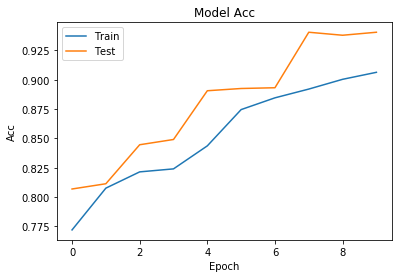

In [35]:
# Plot loss over time.
plt.figure()
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model Acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show();

### Testing on Unseen Data:
Now that the model is fit, lets see if we can use it to detect some planets in data not seen before.

In [36]:
#  make sure this is the right size, the right number of columns


In [42]:
unseen_data = c4_kep.iloc[:,2:3199]
unseen_data.drop(index=7713, inplace = True)
unseen_data.tail()

,2,3,4,5,6,7,8,9,10,11,...,3189,3190,3191,3192,3193,3194,3195,3196,3197,3198
7708,11319.682617,11319.583008,11319.483398,11327.371094,11326.530273,11322.001953,11325.246094,11317.274414,11325.209961,11315.040039,...,11315.725586,11318.500000,11325.413086,11309.351562,11320.790039,11326.581055,11316.476562,11317.428711,11312.616211,11308.830078
7709,7623.983398,7621.442383,7618.901367,7619.235352,7622.194824,7621.204590,7620.562500,7613.972168,7619.979004,7622.914551,...,7621.973633,7616.027832,7616.118164,7619.416504,7613.662109,7627.311523,7616.322266,7626.585449,7626.179688,7629.745117
7710,26916.777344,26915.885742,26914.994141,26919.958984,26918.572266,26908.222656,26908.228516,26914.849609,26920.458984,26910.843750,...,26923.214844,26925.933594,26918.978516,26909.220703,26917.160156,26926.078125,26914.830078,26917.787109,26912.976562,26912.085938
7711,34512.160156,34508.902344,34505.644531,34503.800781,34504.421875,34504.312500,34496.136719,34519.199219,34513.804688,34504.718750,...,34472.511719,34473.394531,34470.164062,34480.593750,34477.785156,34483.500000,34481.949219,34485.648438,34477.027344,34469.027344
7712,36407.671875,36406.587891,36405.503906,36404.976562,36405.671875,36413.835938,36398.070312,36407.812500,36396.792969,36412.937500,...,36400.039062,36392.707031,36405.394531,36406.496094,36397.617188,36407.972656,36405.117188,36405.535156,36406.671875,36400.117188


In [43]:
# scale
##########FIXME!!!!!! don't fit_transform, only fit to training data
unseen_data = unseen_data.T

scaled_unseen = ss.fit_transform(unseen_data)
unseen_data = pd.DataFrame(scaled_unseen, columns=unseen_data.columns)

unseen_data = unseen_data.T

In [44]:
# unseen_data.head()

In [45]:
# Change the shape
array_unseen = np.array(unseen_data)
array_unseen = np.expand_dims(array_unseen, axis = 2)

### Predict!

In [46]:
# predict_proba or classification
#     both, so we know what the model thinks and how confident it is
y_unseen = model.predict_classes(array_unseen)

In [47]:
yhat_unseen = pd.DataFrame(y_unseen, columns=['prediction'])
# yhat_unseen.head(5)

In [48]:
val_counts = yhat_unseen['prediction'].value_counts()
print(val_counts[1]/val_counts.sum())
val_count

0.8642551536367172


0    5050
1    1203
Name: LABEL, dtype: int64

In [ ]:
yhat_unseen[yhat_unseen['prediction'] == 1]

In [ ]:
# take a look at the unseen data
x_axis = list(range(unseen_data.shape[1]-2))
plt.scatter(x_axis, unseen_data.iloc[4028, 2:])
# plt.ylim(-2, 2)

### Example of a Transit:

In [ ]:
x_axis = list(range(join_planets.shape[1]-2))
plt.scatter(x_axis, join_planets.iloc[23, 2:])
# plt.ylim(10040, 10090)
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Possible Solar Flare')

### Notes <hr>

In [ ]:
# # Evaluate model on test data
# score = model.evaluate(X_test_array, y_test, verbose = 1)
# labels = model.metrics_names

# score
# # labels
# # model.summary()

In [ ]:
# # What is the best way to do this?
# undersample?
# oversample?
# What is the best ratio?
# will this affect my result/ my false positive rate?

# change columns of kep3 so you can join it with the planet data
#     make sure there are no gaps in the confirmed planets data
#     or the other data
#     cut down dfs to be the right size
#     do I want to remove the confimed planets already in the kep3 set in case they are repeats?

# is it possible that some of the planets don't pass in front of their stars for the 66 days I'm looking at?
#     what proportion of exoplanets have orbits of less than 66 days?

# how am I going to deal with the nulls?
#     skip to the next nearest non-null value?
#     how many nulls in a row are there?
#     if this happens to almost all confirmed planets, its possible that the network may learn to find these "skips"
#         should I then just drop any rows with too many consecutive nans? 
#         Pretty much every one has a string of at least 40 consecutive nans
#     mean imputation may have a logical case here
#         it would make sense that the level of light is between previous value and the next one + random noise
#         what about for longer strings of missing values 
#         mean imputation could be good for avoiding creating false signals because of its smoothing effect
#         the disadvantages of mean imputation may not be important because I am basically using neural networks for pattern detection
#     maybe if it is a long string of missing values you want to skip to the next real data, 
#         mark if that had happened so I could tell if it contributes to false positives
#     drop rows with more than 150 nulls? there are only 8
#         1134    666
#         752     408
#         851     408
#         1105    408
#         441     408
#         832     285
#         871     230
#         762     230

# definitely get data on whether it is a binary star system or not
#     how to feed these single features to the neural networks to help with pattern detection?

# normalize the light curves

# print out confusion matrix and other classification metrics

# turn it into a gridsearch
#     have it save the results to be analyzed later
#     can I have it tune over generalizability to the unseen set?